In [1]:
#imports

import tensorflow as tf 
from vit_keras import vit, utils, visualize
from keras_flops import get_flops


In [2]:
#definicao dos diretorios

test_dir = r'C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test'
pesos = r"C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\ViT - Experimentos\Experimento 3\model3.h5"

In [3]:
#definicao das configuracoes

image_size = 224
image_shape = (image_size, image_size, 3)
classes = 12

classes_dic ={
    'Codega':'CD',
    'Malvasia Fina':'MF',
    'Malvasia Preta':'MP',
    'Malvasia Rei':'MR',
    'Moscatel Galego':'MG',
    'Mourisco Tinto':'MT',
    'Rabigato':'RG',
    'Tinta Amarela':'TA',
    'Tinta Barroca':'TB',
    'Tinta Roriz':'TR',
    'Tinto Cao':'TC',
    'Touriga Nacional':'TN'
}

classes_num={
    0:'CD',
    1:'MF',
    2:'MP',
    3:'MR',
    4:'MG',
    5:'MT',
    6:'RG',
    7:'TA',
    8:'TB',
    9:'TR',
    10:'TC',
    11:'TN'
}

In [4]:
#carrega o modelo
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalMaxPooling2D


vit_model = vit.vit_b32(
        image_size = image_size,
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = classes)


x = tf.keras.layers.Flatten()(vit_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
output = Dense(classes, activation='softmax')(x)
model = tf.keras.models.Model(vit_model.input, output) 
model.load_weights(pesos)

C:\Python\lib\site-packages\vit_keras\utils.py:81: UserWarning: Resizing position embeddings from 12, 12 to 7, 7
  warnings.warn(


In [5]:
#imprime os flops

flops = get_flops(model, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")

Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
FLOPS: 8.84 G


Notebook run using keras: 2.7.0
------------------------------------
90: 
Found 72 images belonging to 12 classes.
['Codega', 'Malvasia Fina', 'Malvasia Preta', 'Malvasia Rei', 'Moscatel Galego', 'Mourisco Tinto', 'Rabigato', 'Tinta Amarela', 'Tinta Barroca', 'Tinta Roriz', 'Tinto Cao', 'Touriga Nacional']
              precision    recall  f1-score   support

          CD       1.00      0.67      0.80         6
          MF       0.86      1.00      0.92         6
          MP       1.00      1.00      1.00         6
          MR       0.75      1.00      0.86         6
          MG       1.00      1.00      1.00         6
          MT       0.86      1.00      0.92         6
          RG       1.00      0.50      0.67         6
          TA       0.75      1.00      0.86         6
          TB       1.00      0.83      0.91         6
          TR       1.00      1.00      1.00         6
          TC       0.86      1.00      0.92         6
          TN       1.00      0.83      0.91

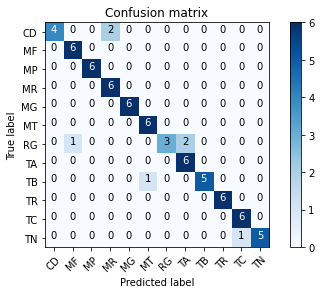

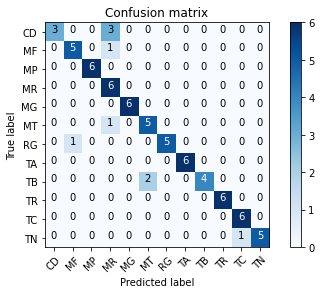

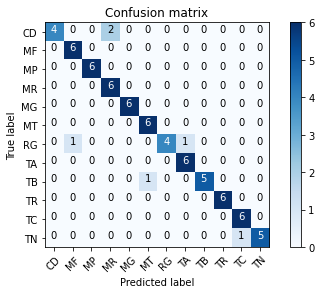

In [6]:
#matriz de confusao 
import os
import tensorflow.keras as keras
from tensorflow.keras.applications import inception_v3 as inc_net
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras import backend as K
from sklearn import metrics
import itertools
print('Notebook run using keras:', keras.__version__)
import random

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def confusion_matrix(test_data_generator, model):
  test_data_generator.reset()
  predictions = model.predict(test_data_generator, steps=test_set.samples)
  # Get most likely class
  predicted_classes = np.argmax(predictions, axis=1)
  true_classes = test_data_generator.classes
  class_labels = list(test_data_generator.class_indices.keys())
  print(class_labels)
  class_labels = [classes_dic[x] for x in class_labels]  

  report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
  cm = metrics.confusion_matrix(true_classes, predicted_classes)
  print(report)
  plot_confusion_matrix(cm, class_labels)

import cv2
rotates = [cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_180, cv2.ROTATE_90_COUNTERCLOCKWISE]
degrees = [90, 180, 270]
for i in range(len(rotates)):

    print('------------------------------------')
    print(str(degrees[i]) + ': ')
    def preprocessing(x):
        aux = cv2.rotate(x, rotates[i])
        aux = vit.preprocess_inputs(aux)
        return aux
    
    test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocessing)
    test_set = test_datagen.flow_from_directory(test_dir, 
                                                target_size=(image_size, image_size),
                                                class_mode='categorical',
                                                batch_size=1,
                                                shuffle=False)

    test_set.reset()
    confusion_matrix(test_set, model)

C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Codega\IMG_0320.JPG :
Prediction: MR


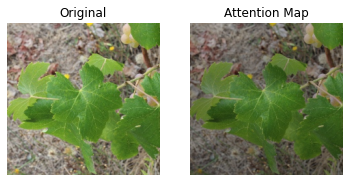

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Codega\IMG_0327.JPG :
Prediction: CD


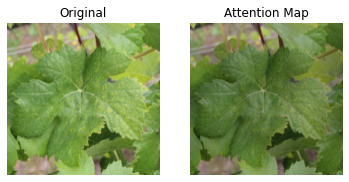

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Codega\IMG_0331.JPG :
Prediction: CD


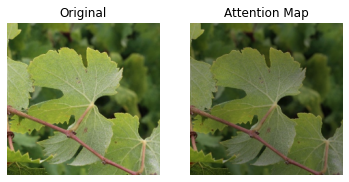

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Codega\IMG_0350.JPG :
Prediction: MR


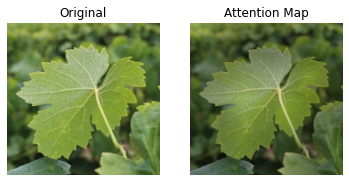

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Codega\IMG_0357.JPG :
Prediction: MR


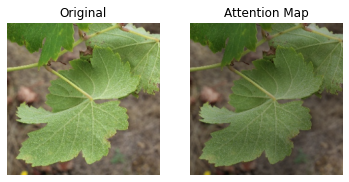

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Codega\IMG_0358.JPG :
Prediction: CD


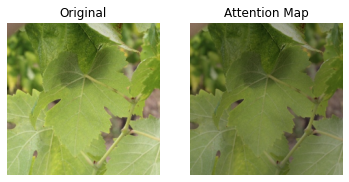

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Malvasia Fina\IMG_9832.JPG :
Prediction: MF


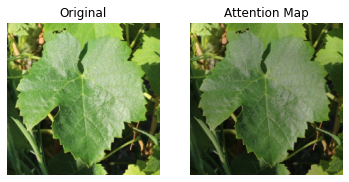

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Malvasia Fina\IMG_9848.JPG :
Prediction: MF


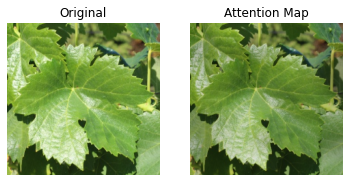

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Malvasia Fina\IMG_9851.JPG :
Prediction: MF


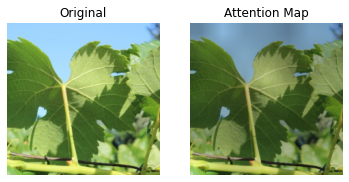

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Malvasia Fina\IMG_9858.JPG :
Prediction: MF


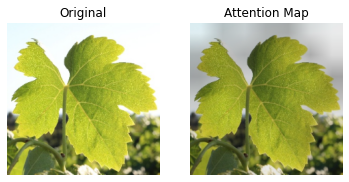

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Malvasia Fina\IMG_9865.JPG :
Prediction: MF


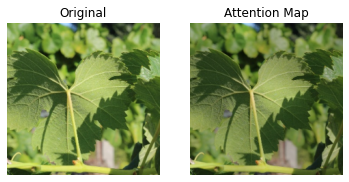

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Malvasia Fina\IMG_9891.JPG :
Prediction: MF


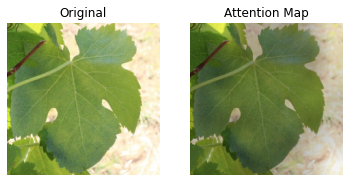

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Malvasia Preta\IMG_0223.JPG :
Prediction: MP


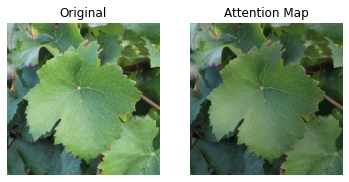

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Malvasia Preta\IMG_0229.JPG :
Prediction: MP


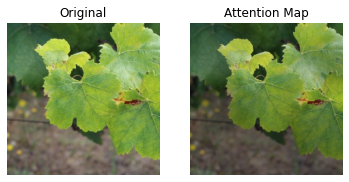

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Malvasia Preta\IMG_0244.JPG :
Prediction: MP


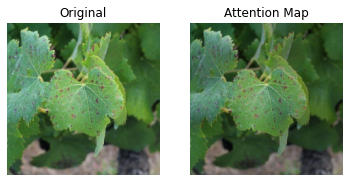

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Malvasia Preta\IMG_0251.JPG :
Prediction: MP


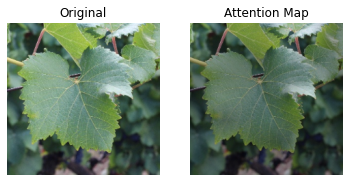

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Malvasia Preta\IMG_0252.JPG :
Prediction: MP


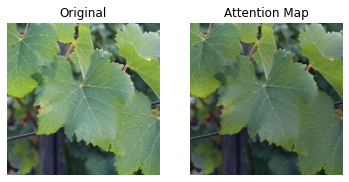

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Malvasia Preta\IMG_0255.JPG :
Prediction: MP


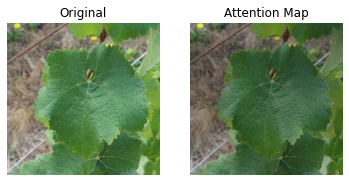

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Malvasia Rei\IMG_0383.JPG :
Prediction: MR


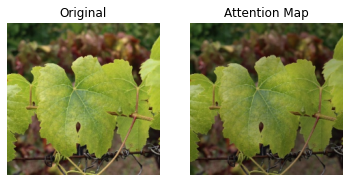

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Malvasia Rei\IMG_0387.JPG :
Prediction: MR


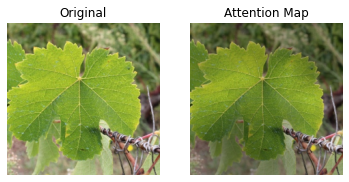

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Malvasia Rei\IMG_0396.JPG :
Prediction: MR


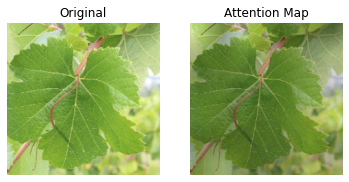

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Malvasia Rei\IMG_0426.JPG :
Prediction: MR


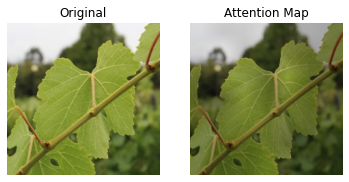

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Malvasia Rei\IMG_0436.JPG :
Prediction: MR


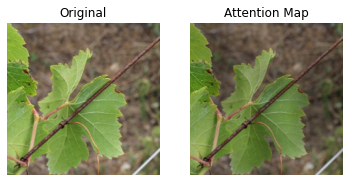

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Malvasia Rei\IMG_0438.JPG :
Prediction: MR


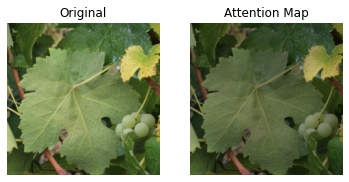

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Moscatel Galego\IMG_0015.JPG :
Prediction: MG


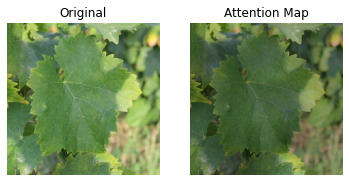

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Moscatel Galego\IMG_0018.JPG :
Prediction: MG


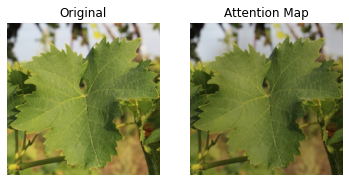

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Moscatel Galego\IMG_0025.JPG :
Prediction: MG


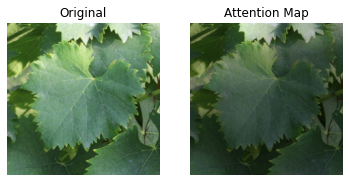

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Moscatel Galego\IMG_0027.JPG :
Prediction: MG


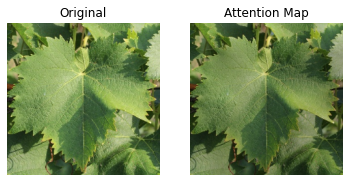

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Moscatel Galego\IMG_0035.JPG :
Prediction: MG


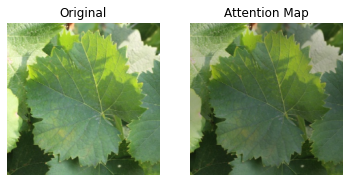

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Moscatel Galego\IMG_0053.JPG :
Prediction: MG


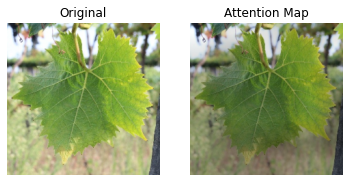

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Mourisco Tinto\IMG_0082.JPG :
Prediction: MT


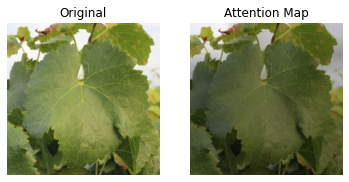

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Mourisco Tinto\IMG_0092.JPG :
Prediction: MT


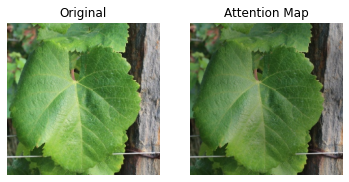

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Mourisco Tinto\IMG_0111.JPG :
Prediction: MT


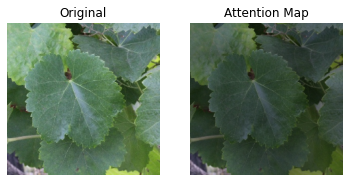

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Mourisco Tinto\IMG_0123.JPG :
Prediction: MT


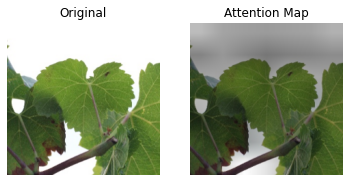

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Mourisco Tinto\IMG_0144.JPG :
Prediction: MT


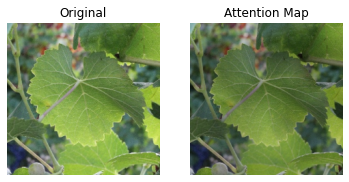

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Mourisco Tinto\IMG_0146.JPG :
Prediction: MT


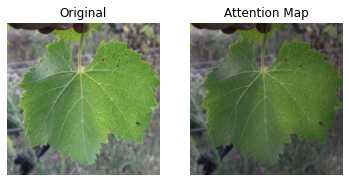

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Rabigato\IMG_9933.JPG :
Prediction: RG


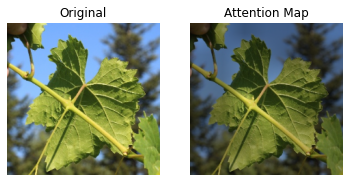

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Rabigato\IMG_9941.JPG :
Prediction: RG


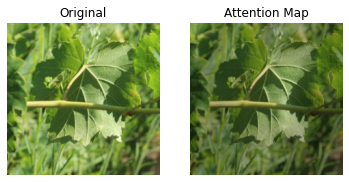

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Rabigato\IMG_9942.JPG :
Prediction: MF


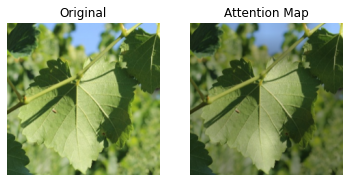

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Rabigato\IMG_9945.JPG :
Prediction: RG


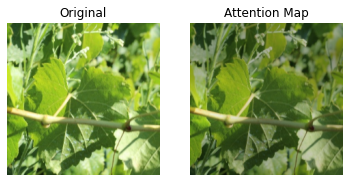

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Rabigato\IMG_9960.JPG :
Prediction: RG


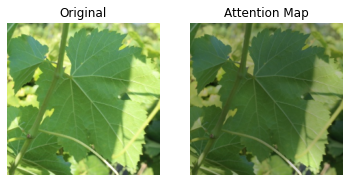

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Rabigato\IMG_9965.JPG :
Prediction: RG


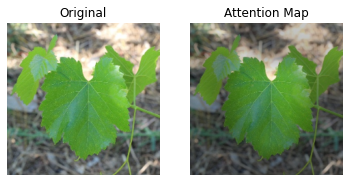

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinta Amarela\IMG_9682.JPG :
Prediction: TA


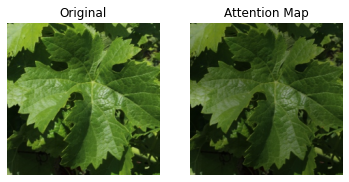

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinta Amarela\IMG_9694.JPG :
Prediction: TA


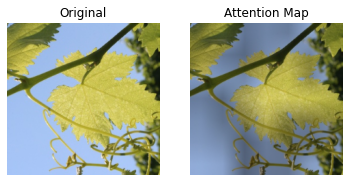

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinta Amarela\IMG_9704.JPG :
Prediction: TA


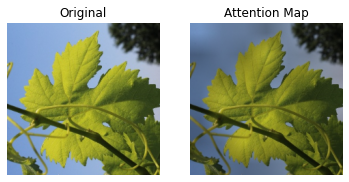

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinta Amarela\IMG_9716.JPG :
Prediction: TA


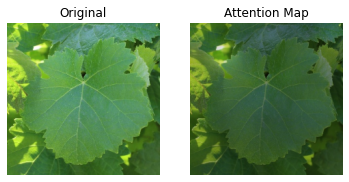

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinta Amarela\IMG_9720.JPG :
Prediction: TA


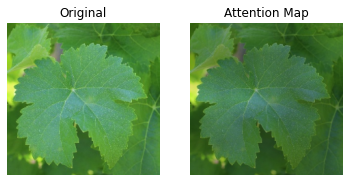

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinta Amarela\IMG_9723.JPG :
Prediction: TA


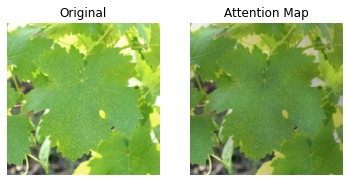

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinta Barroca\IMG_0156.JPG :
Prediction: TB


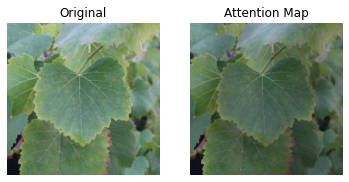

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinta Barroca\IMG_0185.JPG :
Prediction: TB


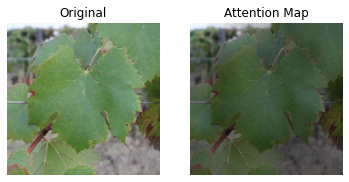

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinta Barroca\IMG_0194.JPG :
Prediction: TB


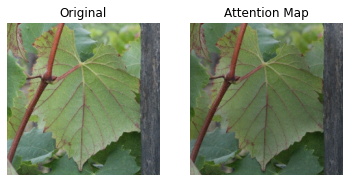

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinta Barroca\IMG_0202.JPG :
Prediction: TB


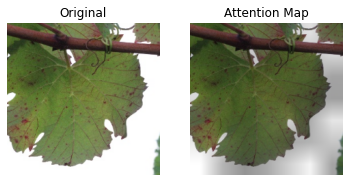

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinta Barroca\IMG_0209.JPG :
Prediction: TB


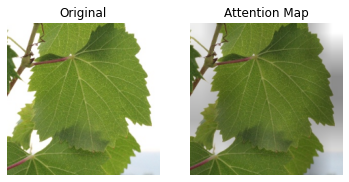

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinta Barroca\IMG_0210.JPG :
Prediction: TB


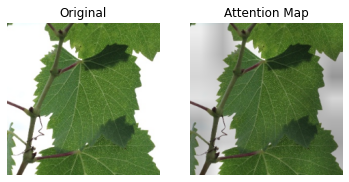

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinta Roriz\IMG_0518.JPG :
Prediction: TR


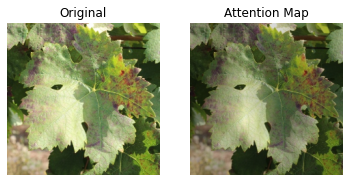

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinta Roriz\IMG_0544.JPG :
Prediction: TR


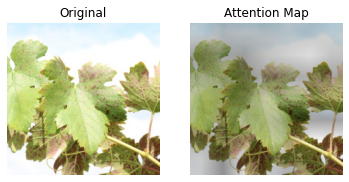

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinta Roriz\IMG_0545.JPG :
Prediction: TR


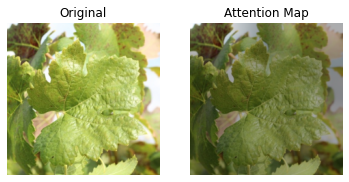

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinta Roriz\IMG_0549.JPG :
Prediction: TR


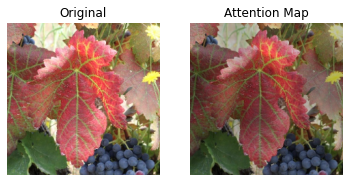

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinta Roriz\IMG_0559.JPG :
Prediction: TR


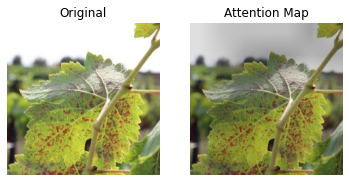

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinta Roriz\IMG_0568.JPG :
Prediction: TR


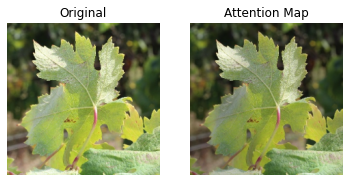

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinto Cao\IMG_0456.JPG :
Prediction: TC


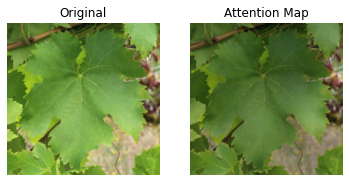

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinto Cao\IMG_0470.JPG :
Prediction: TC


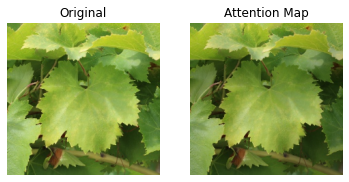

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinto Cao\IMG_0486.JPG :
Prediction: TC


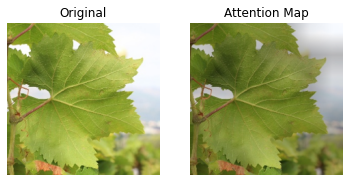

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinto Cao\IMG_0488.JPG :
Prediction: TC


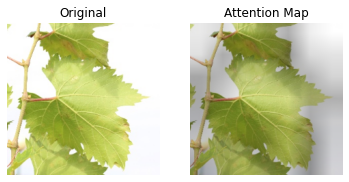

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinto Cao\IMG_0498.JPG :
Prediction: TC


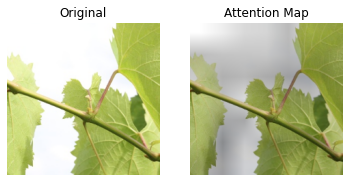

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Tinto Cao\IMG_0499.JPG :
Prediction: TC


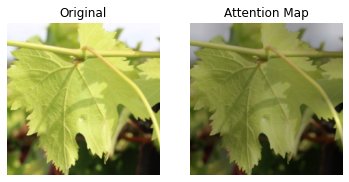

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Touriga Nacional\IMG_0601.JPG :
Prediction: TN


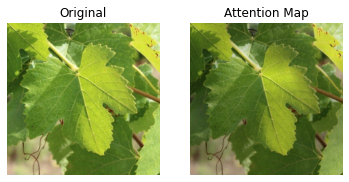

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Touriga Nacional\IMG_0602.JPG :
Prediction: TN


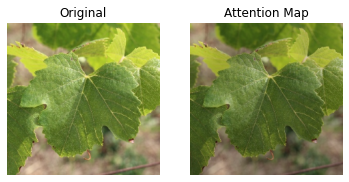

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Touriga Nacional\IMG_0636.JPG :
Prediction: TN


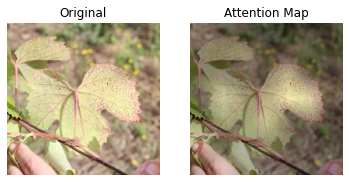

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Touriga Nacional\IMG_0637.JPG :
Prediction: TC


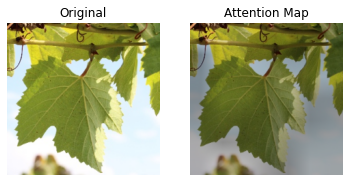

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Touriga Nacional\IMG_0640.JPG :
Prediction: TN


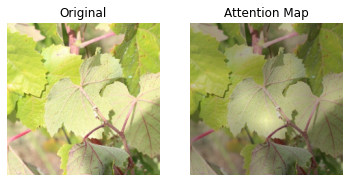

---------------------
C:\Users\Gabriel\OneDrive - Universidade de Tras-os-Montes e Alto Douro\UTAD\2020-2021\Pesquisa\Dataset\dataset_aumentado_todas\dataset_aumentado\test\Touriga Nacional\IMG_0663.JPG :
Prediction: TN


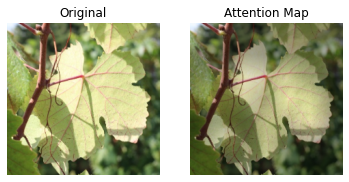

---------------------


In [15]:
#mapas de atenção 

import pandas as pd
import glob
#metodo que itera pelos arquivos do diretorio salvando a path da imagem e sua respectiva classe

paths = test_set.filepaths

for i, url in enumerate(paths):
  print(url, ':')
  # Get an image and compute the attention map
  image = utils.read(url, image_size)
  attention_map = visualize.attention_map(model=model, image=image)
  print('Prediction:', classes_num[
      model.predict(vit.preprocess_inputs(image)[np.newaxis])[0].argmax()]
  )  # Prediction: Eskimo dog, husky

  # Plot results
  fig, (ax1, ax2) = plt.subplots(ncols=2)
  ax1.axis('off')
  ax2.axis('off')
  ax1.set_title('Original')
  ax2.set_title('Attention Map')
  _ = ax1.imshow(image)
  _ = ax2.imshow(attention_map)
  plt.show()
  print('---------------------')